Model Accuracy: 0.68
Confusion Matrix:
[[135   0]
 [ 65   0]]


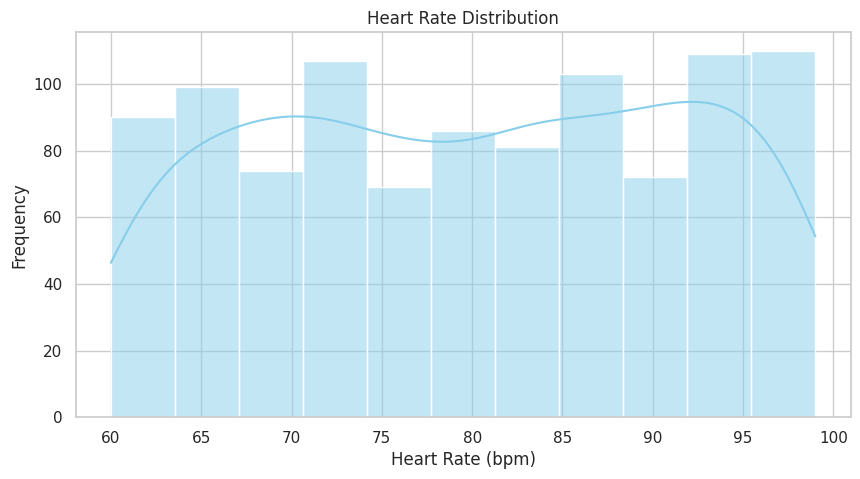

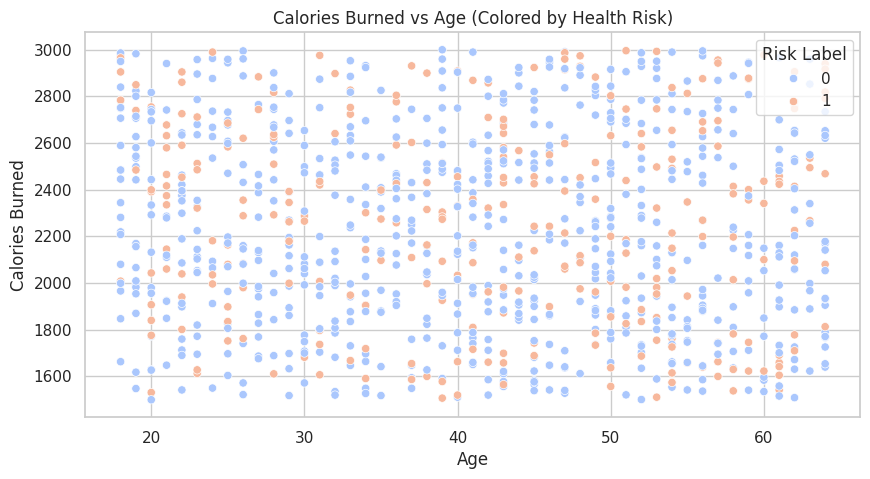

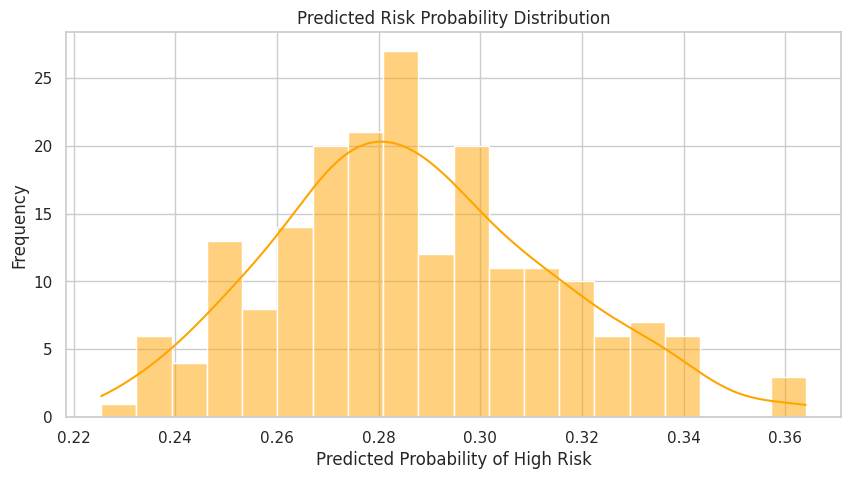

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Step 2 : Creating Random Data

np.random.seed(42)
data_size = 1000
age = np.random.randint(18, 65, size=data_size)
heart_rate = np.random.randint(60, 100, size=data_size)
calories_burned = np.random.randint(1500, 3000, size=data_size)
activity_level = np.random.choice(['Low', 'Medium', 'High'], size=data_size)
risk_label = np.random.choice([0, 1], size=data_size, p=[0.7, 0.3])

#Step 3 : Creating A Data Frame

df = pd.DataFrame({
    'Age': age,
    'Heart Rate': heart_rate,
    'Calories Burned': calories_burned,
    'Activity Level': activity_level,
    'Risk Label': risk_label
})
df['Activity Level'] = df['Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
X = df[['Age', 'Heart Rate', 'Calories Burned', 'Activity Level']]
y = df['Risk Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4 : Model

model = LogisticRegression()
model.fit(X_train, y_train)

#Step 5 : Assistment

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Step 6 : Creating Charts On Basies Of Created Data

sns.set(style="whitegrid")

# Heart Rate Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Heart Rate'], kde=True, color="skyblue")
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.show()

# Calories Burned vs. Age
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age", y="Calories Burned", hue="Risk Label", data=df, palette="coolwarm")
plt.title("Calories Burned vs Age (Colored by Health Risk)")
plt.xlabel("Age")
plt.ylabel("Calories Burned")
plt.show()

# Risk Probability Prediction
plt.figure(figsize=(10, 5))
risk_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(risk_prob, bins=20, kde=True, color="orange")
plt.title("Predicted Risk Probability Distribution")
plt.xlabel("Predicted Probability of High Risk")
plt.ylabel("Frequency")
plt.show()
